In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import imageio

In [0]:
cat = imageio.imread('https://preview.redd.it/28jopuqr7tr41.jpg?width=640&crop=smart&auto=webp&s=d0af749fb0cd29379842aa79c808627d2d7a28ab')

In [0]:
cat = cat[:, :, 0]
cat = cat.astype(np.float32)/255

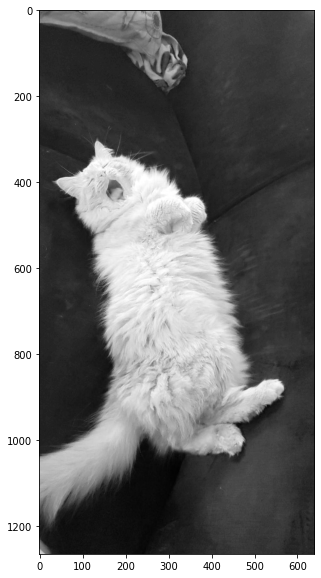

In [5]:
plt.figure(figsize=(10, 10))
plt.imshow(cat, cmap='gray')

In [6]:
cat.shape

(1265, 640)

In [0]:
def gaussian_kernel(kernel_size=7, n_sigma=1):
    x = np.linspace(-n_sigma, n_sigma, kernel_size+1)
    kern1d = np.diff(stats.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    return kern2d/kern2d.sum()

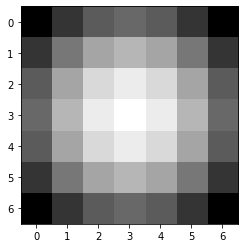

In [15]:
plt.imshow(gaussian_kernel(), cmap='gray')

In [0]:
def apply_filter(img, kernel):
  out_img = np.zeros(
      (img.shape[0] - kernel.shape[0] + 1,
       img.shape[1] - kernel.shape[1] + 1),
       dtype=np.float32)
  for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
      try:
        x = img[i:i + kernel.shape[0], j:j + kernel.shape[1]]
        out_img[i, j] =  np.sum(x*kernel)
      except:
        pass

  out_img = out_img/np.sum(out_img)  
    
  return out_img

In [0]:
def gaussian_blur(img, window_size, n_sigma):
  kernel = gaussian_kernel(window_size, n_sigma)
  out_img = apply_filter(img, kernel)
  return out_img


In [0]:
def vertical_boundaries(img):
  kernel = np.zeros((3, 3))
  kernel[:, 2] = 1
  kernel[:, 0] = -1
  out_img = apply_filter(img, kernel)
  return out_img

In [0]:
def horizontal_boundaries(img):
  kernel = np.zeros((3, 3))
  kernel[2, :] = 1
  kernel[0, :] = -1
  out_img = apply_filter(img, kernel)
  return out_img

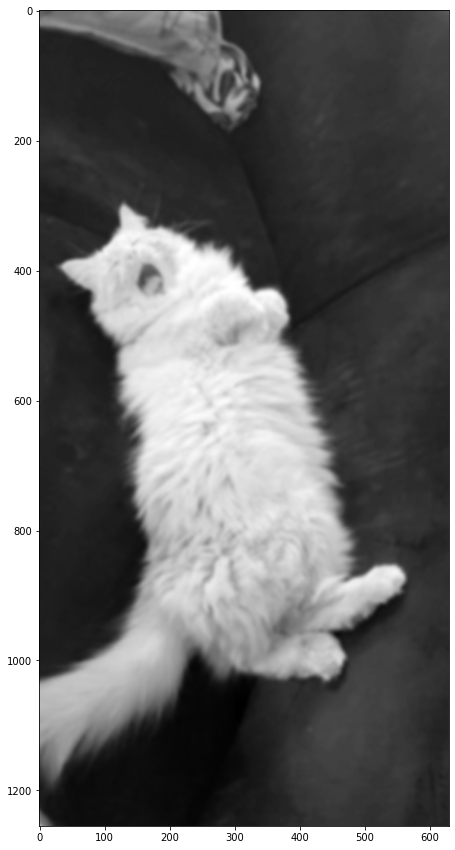

In [34]:
plt.figure(figsize=(15, 15))
plt.imshow(gaussian_blur(cat, 11, 2), cmap='gray')

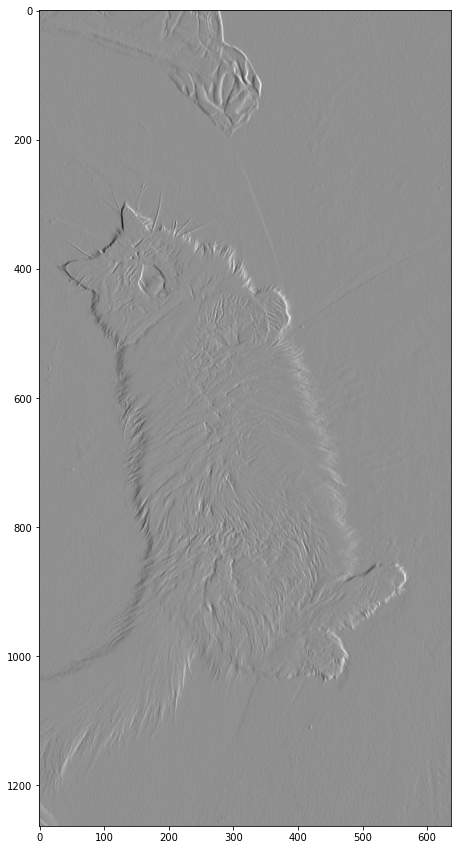

In [39]:
plt.figure(figsize=(15, 15))
plt.imshow(vertical_boundaries(cat), cmap='gray')

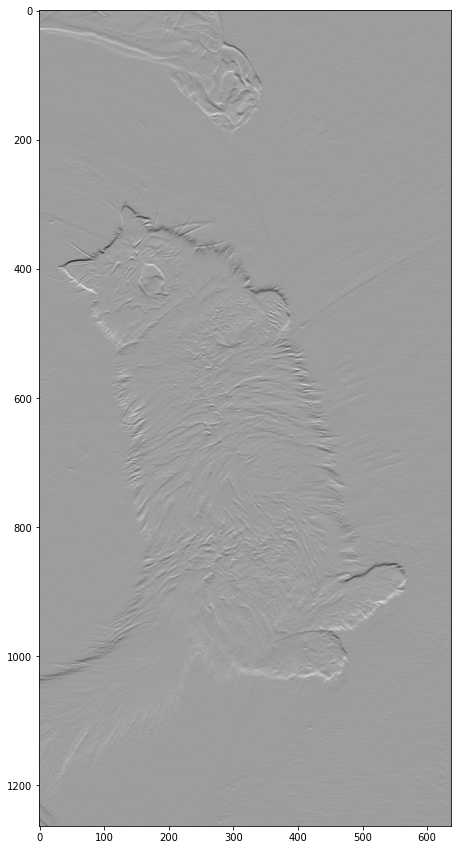

In [41]:
plt.figure(figsize=(15, 15))
plt.imshow(horizontal_boundaries(cat), cmap='gray')

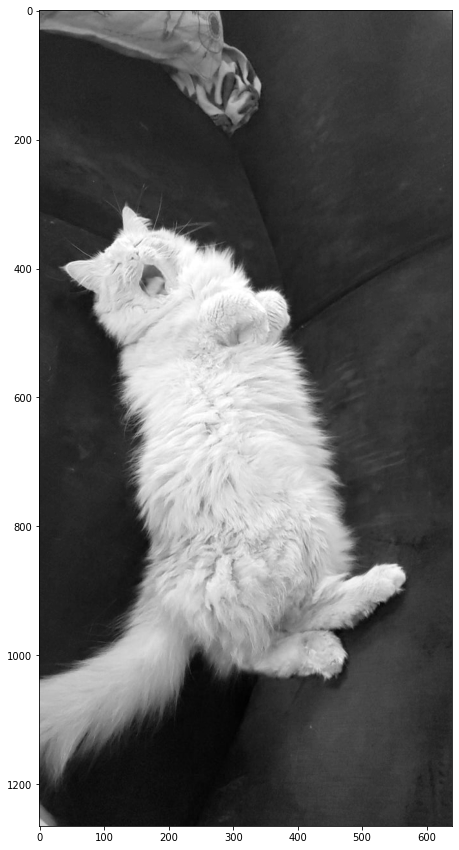

In [19]:
plt.figure(figsize=(15, 15))
plt.imshow(cat, cmap='gray')